## PCA on movie posters 

In [171]:
import numpy as np
from sklearn.decomposition import PCA
import os
from pylab import imread, imshow
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import imresize
import matplotlib.image as mpimg
import pandas as pd

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA

from sklearn.metrics import hamming_loss


In [172]:
############# Read in movie genres ################

ids_genres = pd.read_csv('./full_movie_merge_genres.csv')
ids_genres = ids_genres[['tmdb_id', 'group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7']]

In [220]:
ids_genres.head()

tmdb_id  group1  group2  group3  group4  group5  group6  group7
0      180       0       1       0       0       0       1       0
1       74       0       1       0       0       0       1       0
2      840       0       1       0       0       0       1       0
3    44115       0       1       0       0       0       1       0
4   242512       0       1       0       0       0       0       0

In [173]:
############# Read in posters from folder ################

poster_paths = os.listdir('../posters')
num_posters = np.shape(poster_paths)[0]
# function to convert 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [233]:
############# merge all ids with the one hot encoded genres ###################
tmdb_ids = map(lambda x: int(x[:-4]), poster_paths) 
poster_id_genre = ids_genres[ids_genres['tmdb_id'].isin(tmdb_ids)]
poster_id_genre_nodupes = poster_id_genre.drop_duplicates()

In [234]:
print(len(tmdb_ids))
print('num ids', ids_genres.shape)
print('num merged ids', poster_id_genre.shape)
print('num merged ids no dupes', poster_id_genre_nodupes.shape)

6181
('num ids', (6340, 8))
('num merged ids', (6340, 8))
('num merged ids no dupes', (6167, 8))


In [ ]:
ids_train, ids_test, 

In [174]:
######### Training set ################
n_train = 100
posters_train = []
ids_train = []
errors_train = 0
for poster in poster_paths[:n_train]:
    img = mpimg.imread('../posters/' + str(poster)) 
    # grayscale image 
    gray = rgb2gray(img)
    try:
        scaled = imresize(gray, (741,500))
        posters_train.append(np.asarray(scaled))
        ids_train.append(poster)
    except ValueError:
        errors_train +=1
        continue
posters_array_train = np.asarray(posters_train)
print 'posters shape: ', posters_array_train.shape
print 'errors: ', errors_train

posters shape:  (100, 741, 500)
errors:  0


In [182]:
######### Testing set ################
n_test = 100
posters_test = []
ids_test = []
errors_test = 0
for poster in poster_paths[n_train+1:n_train+1+n_test]:
    img = mpimg.imread('../posters/' + str(poster)) 
    # grayscale image 
    gray = rgb2gray(img)
    try:
        scaled = imresize(gray, (741,500))
        posters_test.append(np.asarray(scaled))
        ids_test.append(poster)
    except ValueError:
        errors_test +=1
        continue
posters_array_test = np.asarray(posters_test)
print 'posters shape: ', posters_array_test.shape
print 'errors: ', errors_test

posters shape:  (100, 741, 500)
errors:  0


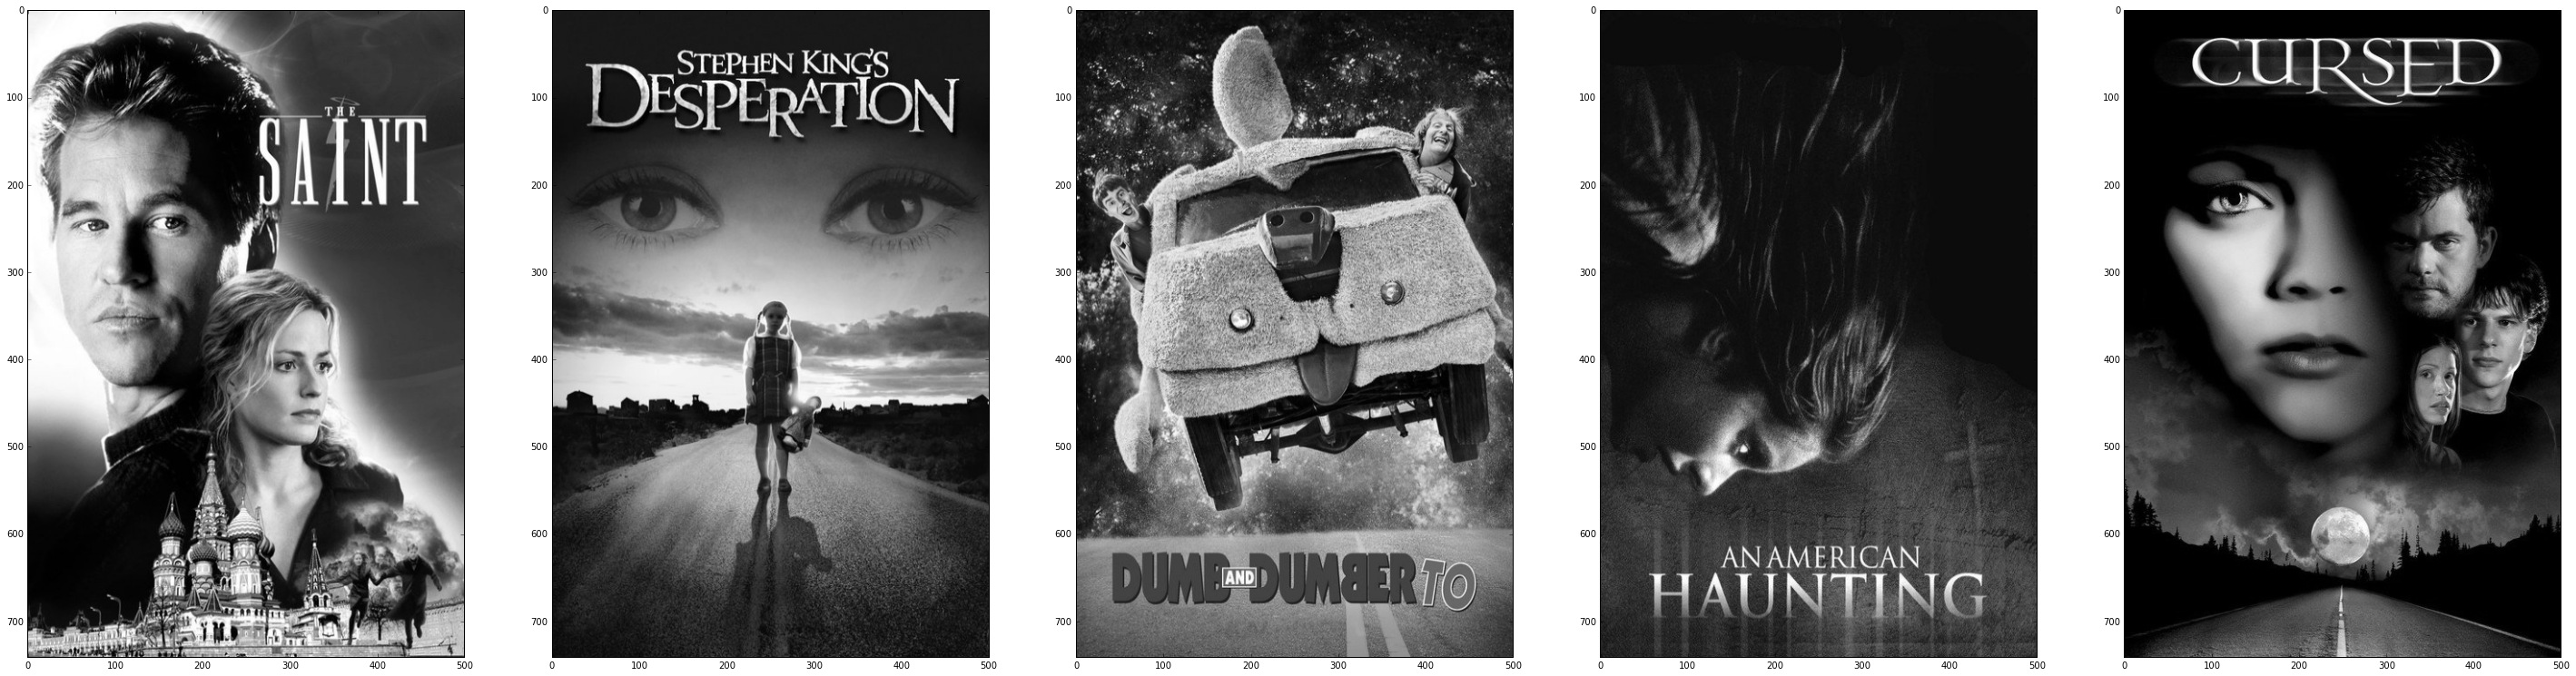

In [183]:
############# Visualise first 5 images of training set ################

plt.figure(figsize=(50,50))
for i in range(1,6):
    plt.subplot(1, 5, i)
    plt.imshow(posters_train[i], cmap = plt.get_cmap('gray'))

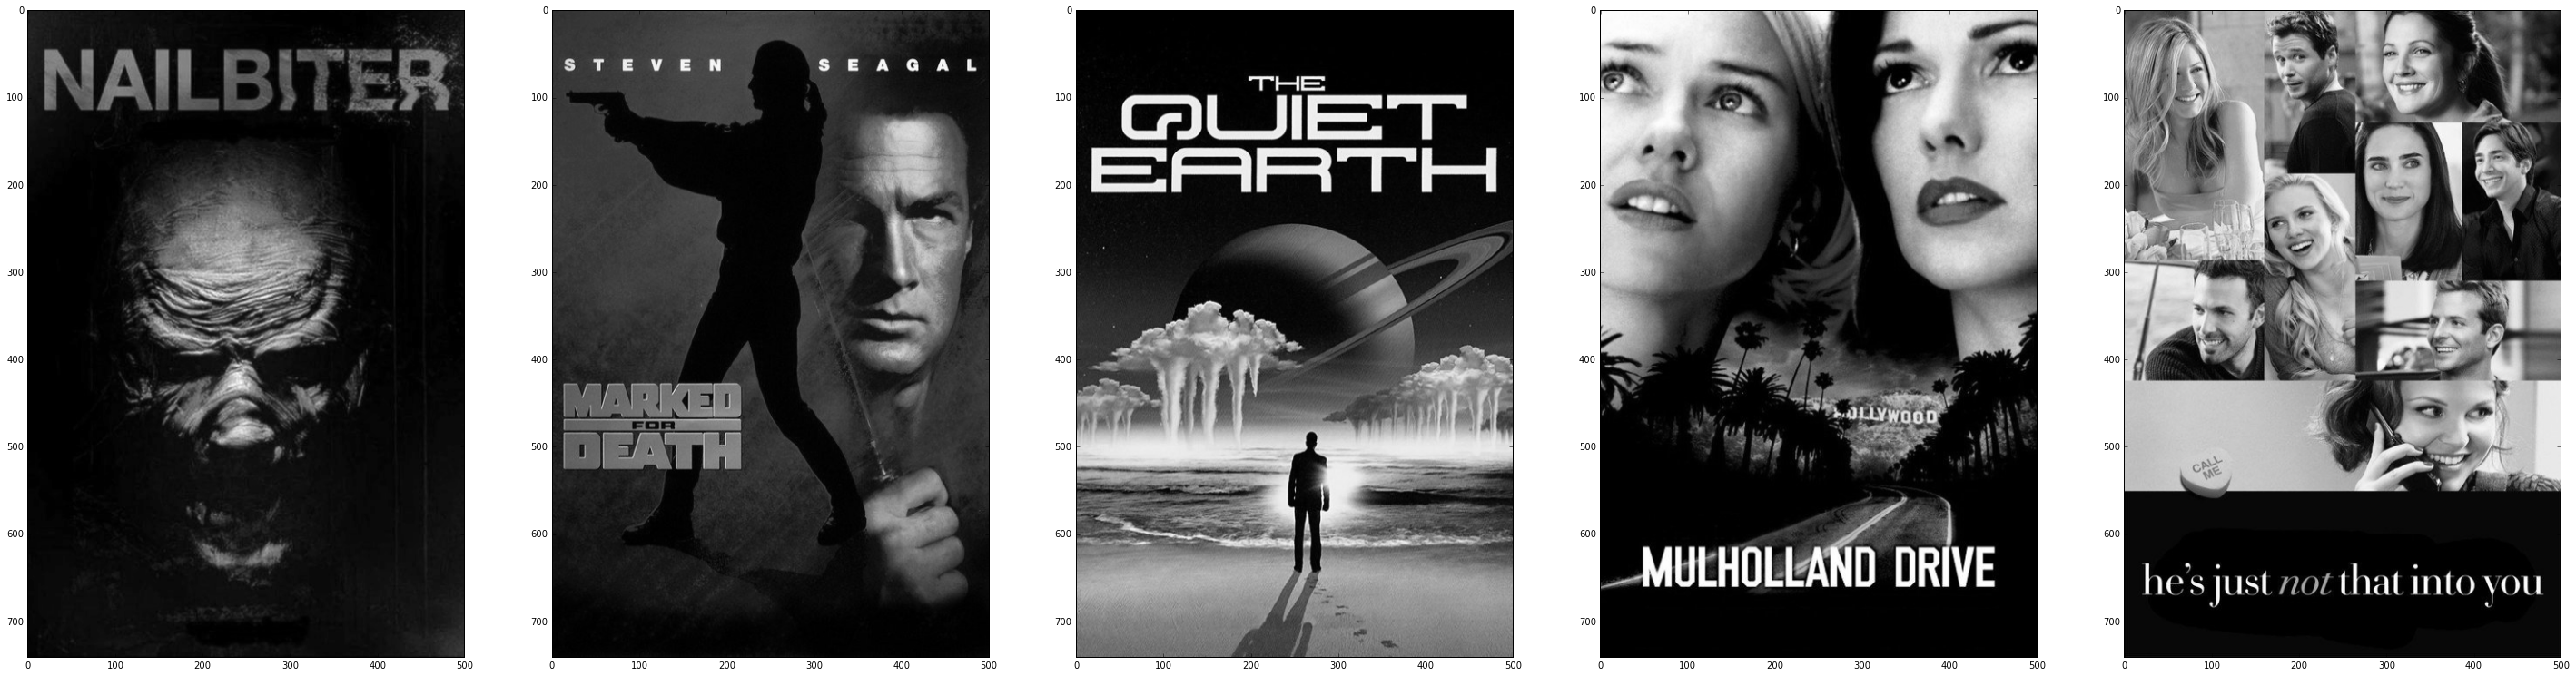

In [184]:
############# Visualise first 5 images of testing set ################

plt.figure(figsize=(50,50))
for i in range(1,6):
    plt.subplot(1, 5, i)
    plt.imshow(posters_test[i], cmap = plt.get_cmap('gray'))

flattened shape, (n_samples, n_features):  (100, 370500)


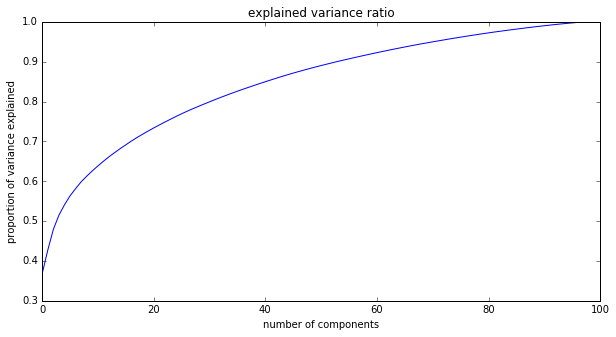

In [185]:
############## flatten training pixels into a single vector #############################

posters_flattened_train = np.array(posters_array_train).reshape((posters_array_train.shape[0], -1))
print 'flattened shape, (n_samples, n_features): ', posters_flattened_train.shape

################### PCA on training set #####################################

posters_flattened_pca = PCA()
pca = posters_flattened_pca.fit(posters_flattened_train)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # explained variance ration
plt.xlabel('number of components')
plt.ylabel('proportion of variance explained')
plt.title('explained variance ratio')

In [186]:
#n_components, n_features
#n_components is initialised to the minimum of 
pca.components_.shape

(100, 370500)

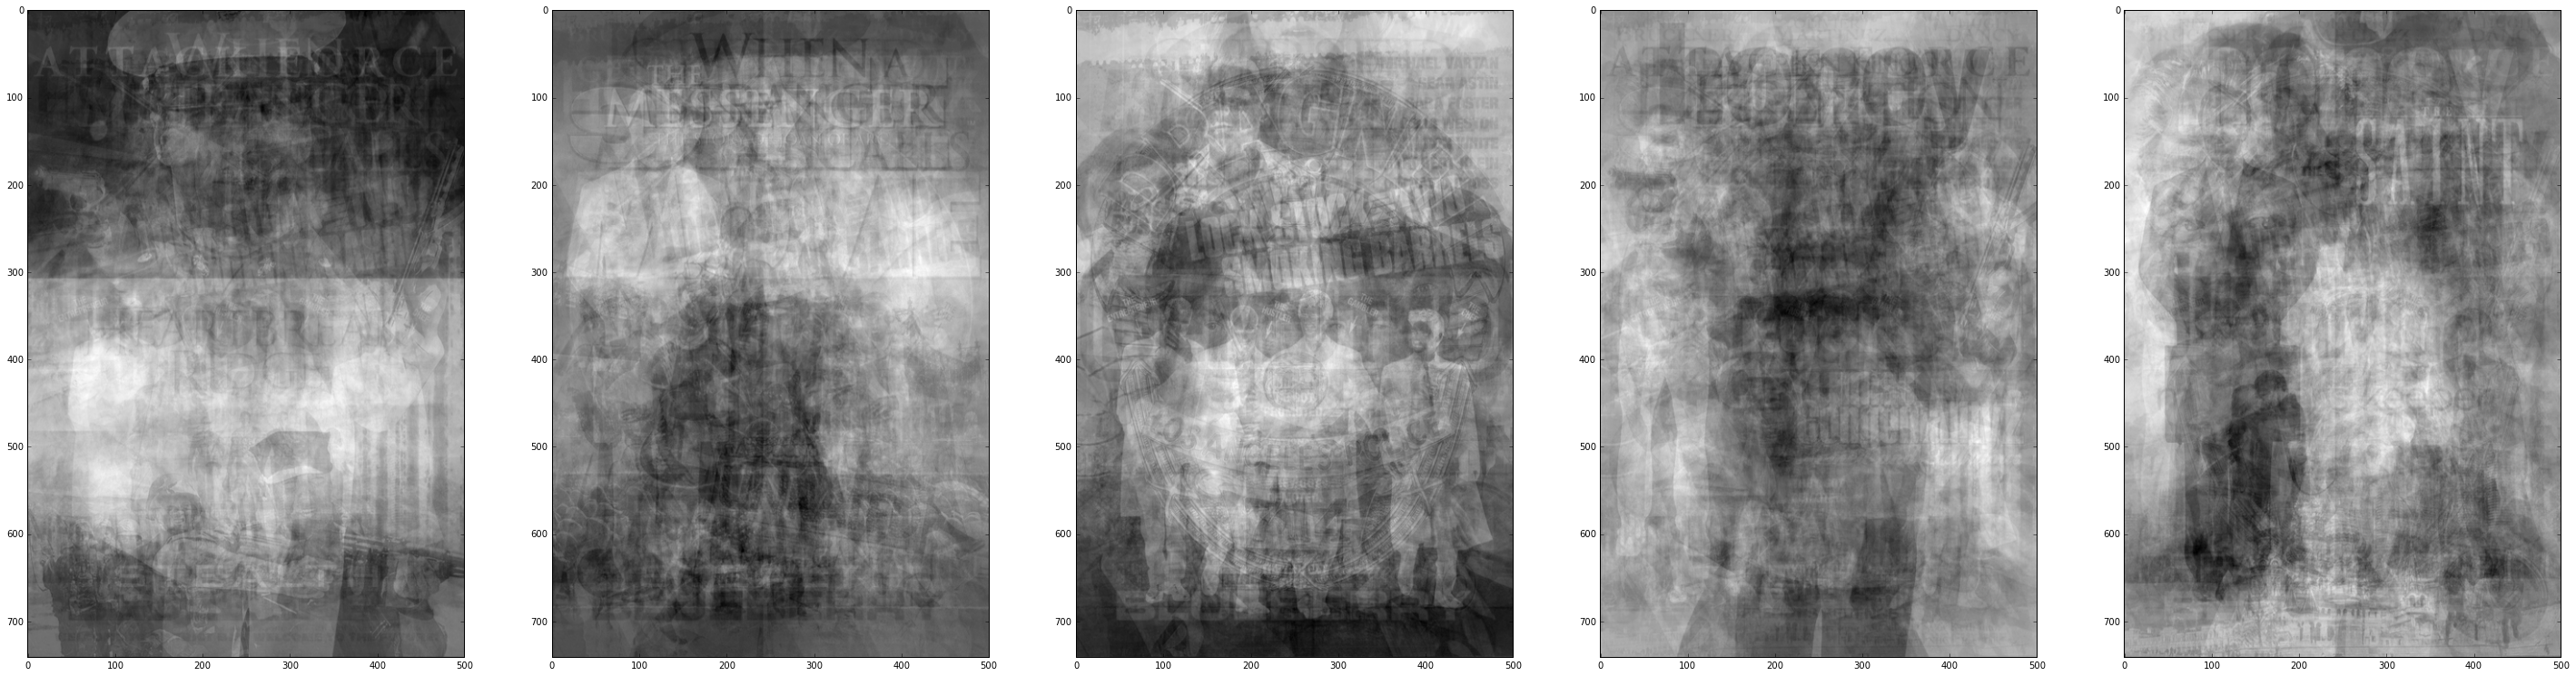

In [94]:
############## TOP 5 principal components ###########################

plt.figure(figsize=(50,50))
for i in range(1,6):
    plt.subplot(1, 5, i)
    plt.imshow(pca.components_[i, :].reshape((741,500)), cmap = plt.get_cmap('gray'))

In [222]:
############## flatten pixels of training set into a single vector #############################
X_train = pca.transform(posters_flattened_train)

tmdb_ids_train = map(lambda x: int(x[:-4]), ids_train) 
poster_ids_train = pd.DataFrame({'tmdb_id': tmdb_ids_train})

subset = ids_genres[ids_genres['tmdb_id'].isin(tmdb_ids_train)]
# Y_genres_train = poster_ids_train.merge(ids_genres, how='outer', left_on='tmdb_id', right_on='tmdb_id')

# Y_nodupes = Y_genres_train.drop_duplicates('tmdb_id')
# Y_train_df = Y_nodupes.drop('tmdb_id', axis=1)

# Y_train = Y_train_df.as_matrix()

In [226]:
ids_train

['100.jpg',
 '10003.jpg',
 '10004.jpg',
 '100042.jpg',
 '10008.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '100183.jpg',
 '10019.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '100241.jpg',
 '10025.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '10030.jpg',
 '10032.jpg',
 '10040.jpg',
 '100416.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '10050.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '100544.jpg',
 '10057.jpg',
 '10060.jpg',
 '10061.jpg',
 '10063.jpg',
 '10064.jpg',
 '10066.jpg',
 '10067.jpg',
 '10068.jpg',
 '10069.jpg',
 '10070.jpg',
 '10071.jpg',
 '10072.jpg',
 '10073.jpg',
 '10074.jpg',
 '10075.jpg',
 '10077.jpg',
 '10081.jpg',
 '10083.jpg',
 '10090.jpg',
 '10092.jpg',
 '10093.jpg',
 '10096.jpg',
 '10104.jpg',
 '10105.jpg',
 '10107.jpg',
 '10115.jpg',
 '10117.jpg',
 '101173.jpg',
 '10118.jpg',
 '10120.jpg',
 '10122.jpg',
 '10124.jpg',
 '10126.jpg',
 '10127.jpg',
 '10128.jpg',
 '10131.jpg',
 '

In [194]:
def exactMatch(Y_test, Y_pred):
    count = 0
    for i in range(49):
        if str(Y_test[i]) == str(Y_pred[i]):
            count +=1
    return float(count)/len(Y_test)

In [195]:
############## flatten pixels of testing set into a single vector #############################

posters_flattened_test = np.array(posters_array_test).reshape((posters_array_test.shape[0], -1))
print 'flattened shape, (n_samples, n_features): ', posters_flattened_test.shape

X_test = pca.transform(posters_flattened_test)

tmdb_ids_test = map(lambda x: int(x[:-4]), ids_test) 
poster_ids_test = pd.DataFrame({'tmdb_id': tmdb_ids_test})
Y_genres_test = poster_ids_test.merge(ids_genres, how='left', on='tmdb_id')
Y_nodupes = Y_genres_test.drop_duplicates('tmdb_id')
Y_test_df = Y_nodupes.drop('tmdb_id', axis=1)

Y_test = Y_test_df.as_matrix()

flattened shape, (n_samples, n_features):  (100, 370500)


In [199]:
############## Fit SVM model ######################
classif = OneVsRestClassifier(SVC(kernel='rbf'))
# perform SV classification on each group 
classif.fit(X_train, Y_train)
Y_pred = classif.predict(X_test)


In [200]:
print hamming_loss(Y_test, Y_pred)
print exactMatch(Y_test, Y_pred)

0.175714285714
0.18
